In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [2]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Information About the Data
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Five point summary of Data
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# Shape Of data
print("Shape of Data :",credit.shape)
print("Rows: ", credit.shape[0])
print("Columns: ",credit.shape[1])

Shape of Data : (284807, 31)
Rows:  284807
Columns:  31


***Exploratory Data Analysis and Data Preprocessing***

In [6]:
# Check the any null value present in a Data

credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* No Missing or Null Value present in a Data.

In [7]:
# Check if Duplicate value present or not
credit.duplicated().sum()

1081

* Here is 1081 duplicated value present in Data so first we have to remove those duplicate value from data

In [8]:
# Drop the Duplicate value
credit.drop_duplicates(inplace=True)


In [9]:
credit.shape

(283726, 31)

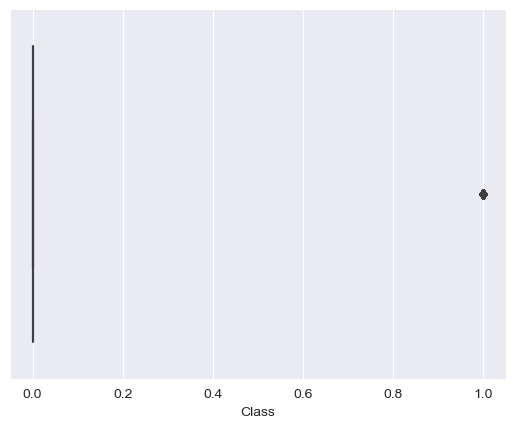

In [10]:
sns.boxplot(x= credit['Class'])
plt.show()

# Single Outlier is effect the data .

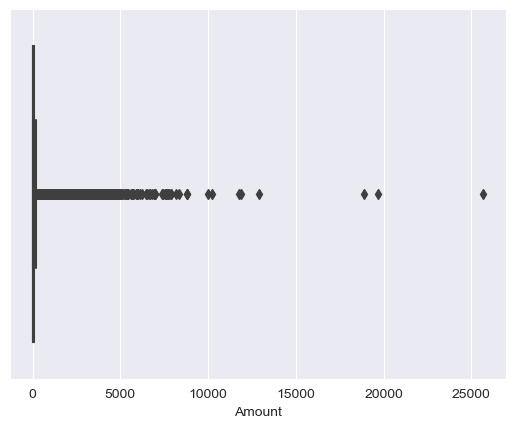

In [11]:
sns.boxplot(x=credit['Amount'])
plt.show()


# In the amount the price is different different and some amount difference create the outlier in 
# Data so we have to fix the outlier in Data.

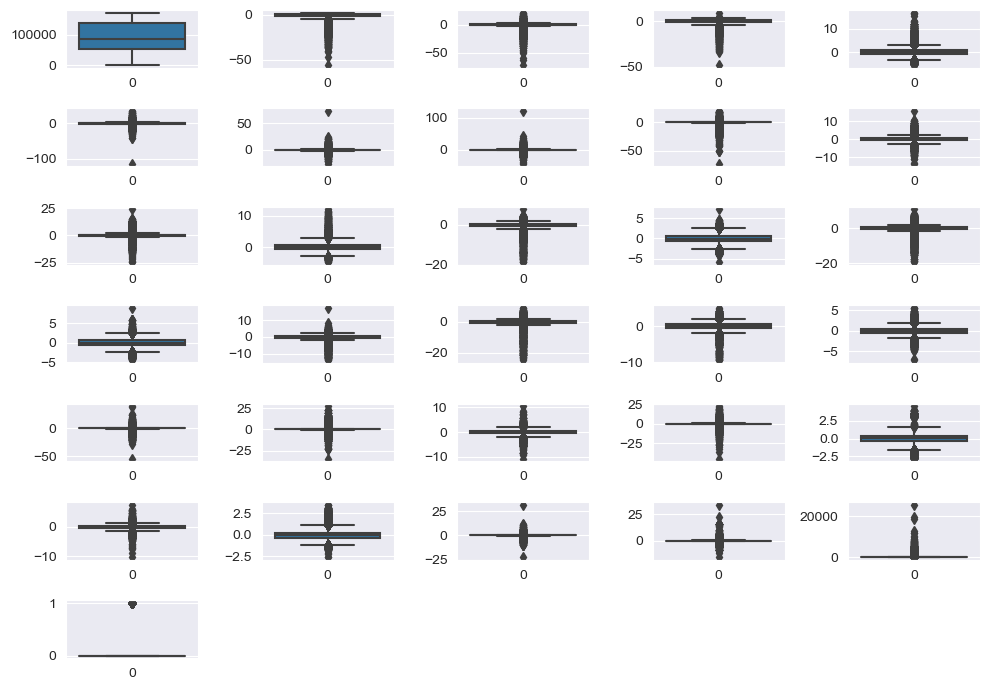

In [12]:
nrows = 5
ncol = 7
repeater = 1
plt.figure(figsize=(10,7))
for i in credit.columns:
    plt.subplot(ncol,nrows,repeater)
    sns.boxplot(credit.loc[:,i])
    repeater = repeater+1
    plt.tight_layout()
plt.show()

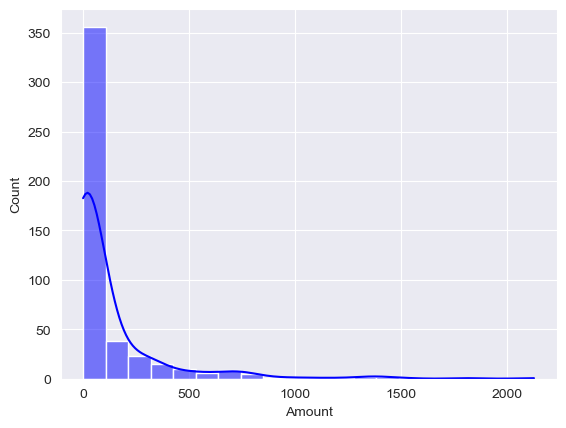

In [13]:
sns.histplot(credit[credit.Class==1].Amount,bins=20,kde=True, color='blue')
plt.show()

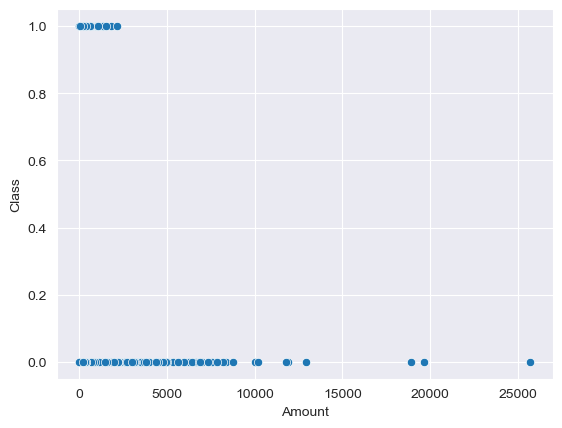

In [14]:
 #Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount",y="Class",data=credit)
plt.show()

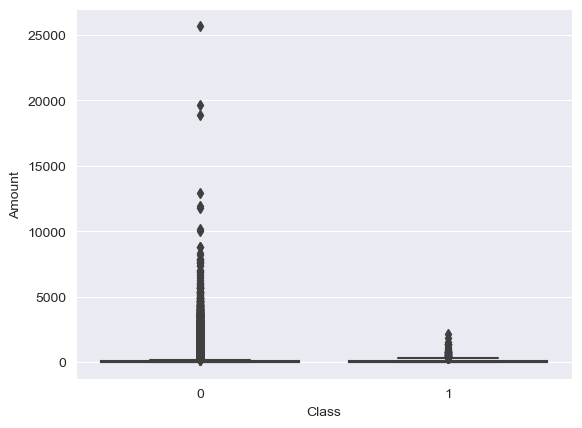

In [15]:
# Compare the class with Amount 

sns.boxplot(x="Class",y="Amount", data= credit)
plt.show()

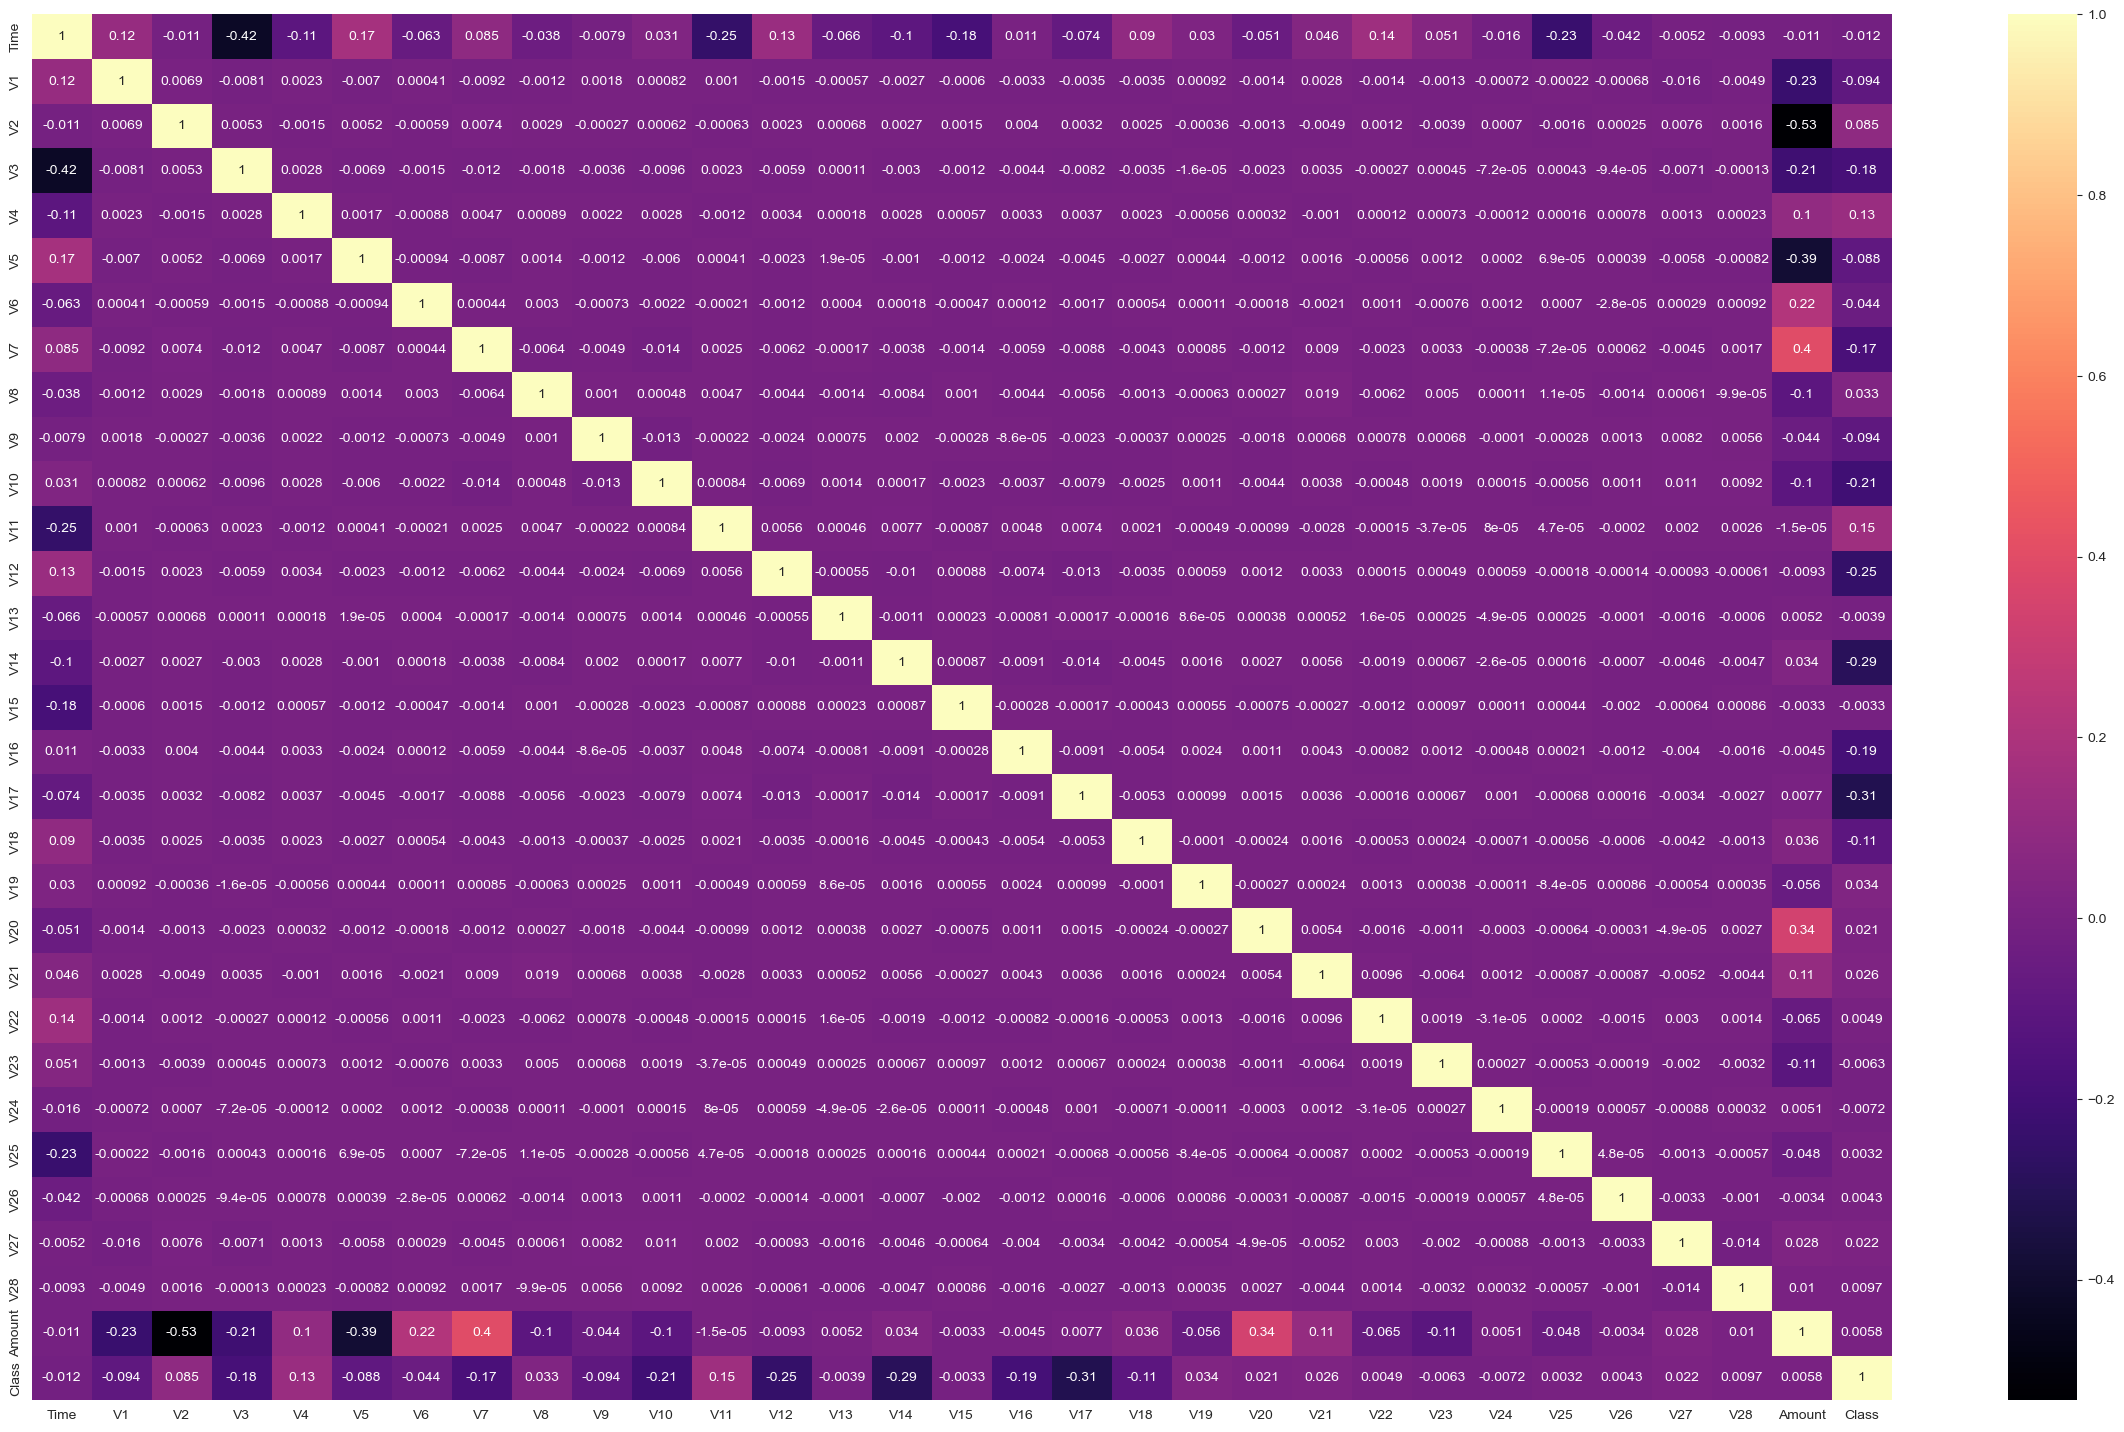

In [16]:
# Chech the Correlation of Data
plt.figure(figsize=(30,18))
sns.heatmap(credit.corr(),annot=True,cmap='magma')
plt.show()

**Compare Fraud and Non Fraud with Class**

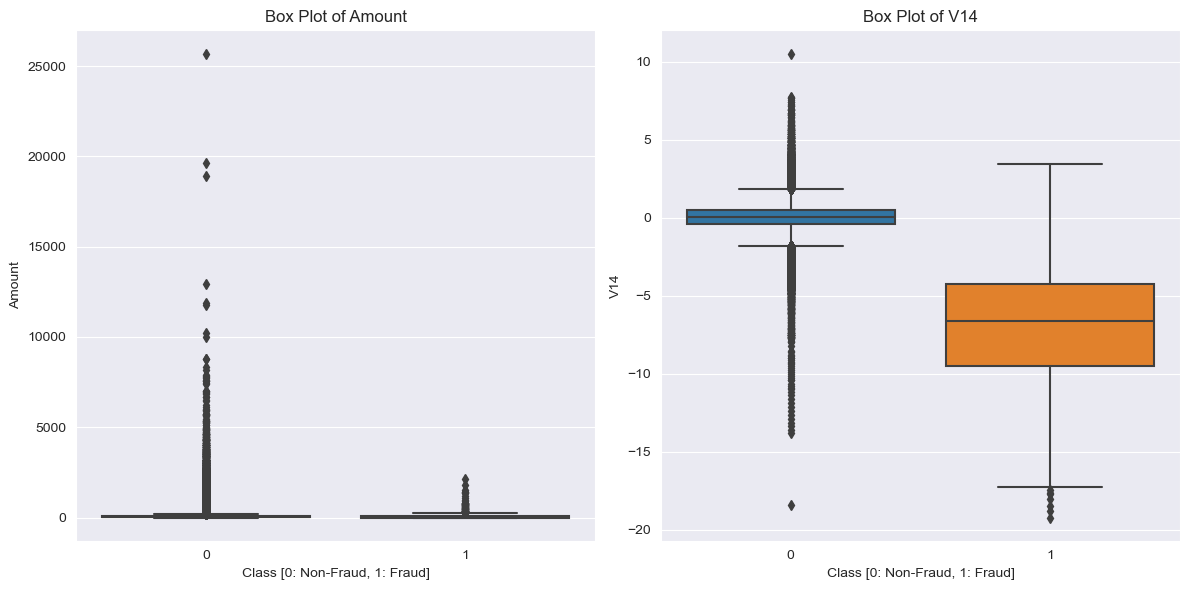

In [17]:
# Assuming 'Amount' and 'V1' are two example features for Fraud Comparision

Two_Feature = ['Amount', 'V14']

plt.figure(figsize=(12, 6))
for i in Two_Feature:
    plt.subplot(1, len(Two_Feature), Two_Feature.index(i) + 1)
    sns.boxplot(x='Class',y=i, data=credit)
    plt.title(f'Box Plot of {i}')
    plt.xlabel('Class [0: Non-Fraud, 1: Fraud]')
    plt.ylabel(i)
    
plt.tight_layout()
plt.show()

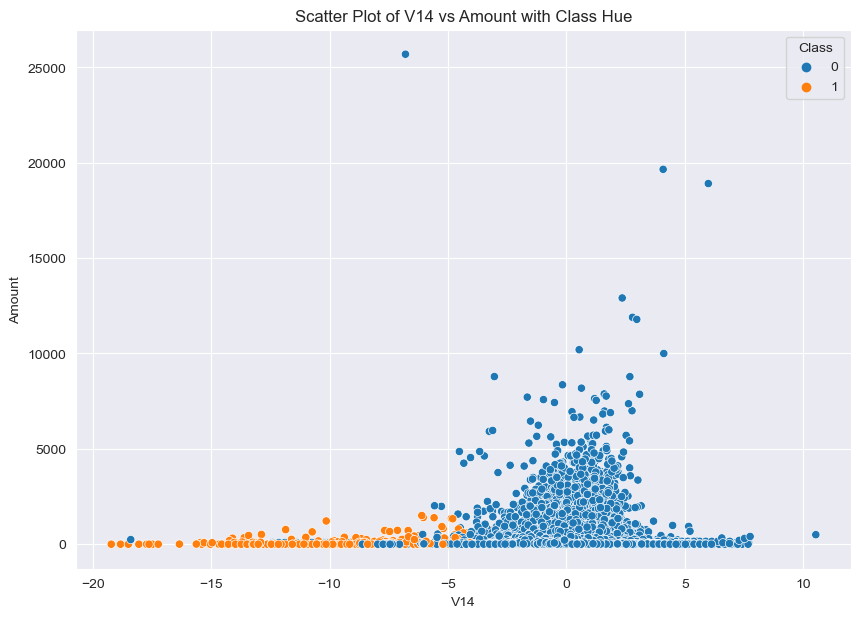

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='V14', y='Amount', hue='Class', data=credit)
plt.title('Scatter Plot of V14 vs Amount with Class Hue')
plt.xlabel('V14')
plt.ylabel('Amount')
plt.show()

**Perform PCA to Treat Outliers**

In [19]:
from sklearn.decomposition import PCA

In [20]:
X = credit.drop('Class',axis=1)
y = credit['Class']
pca = PCA(n_components=2)
pca_model = pca.fit_transform(X)

In [21]:
# Create a DataFrame for visualization
pca_new = pd.DataFrame(data=pca_model, columns=['PC1', 'PC2'])
pca_new['Class'] = y

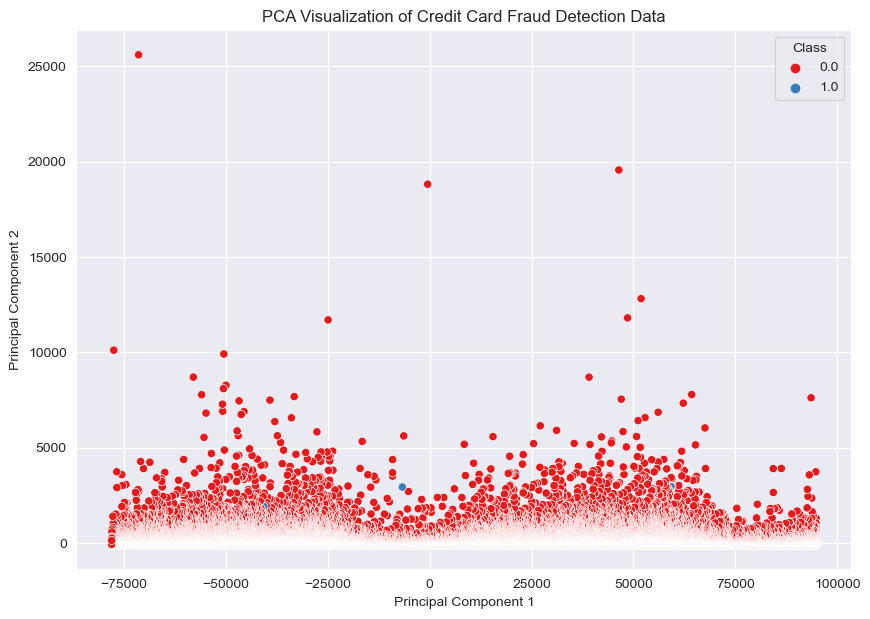

In [22]:
# Create scatter plot of PCA components

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_new, palette='Set1')
plt.title('PCA Visualization of Credit Card Fraud Detection Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

In [23]:
pca_new.head().T

,0,1,2,3,4
PC1,94811.080891,94811.072669,94810.093644,94810.07941,94809.076429
PC2,55.868633,-91.064512,284.914002,29.74901,-23.762861
Class,0.000000,0.000000,0.000000,0.00000,0.000000


**Split the Data**

In [24]:
X = credit.drop('Class',axis=1)
y = credit['Class']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(226980, 30) (56746, 30) (226980,) (56746,)


**Model Prediction**

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
model.score(X_test,y_test)

0.9989955239135798

In [29]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.90%


In [30]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.72      0.60      0.65        90

    accuracy                           1.00     56746
   macro avg       0.86      0.80      0.83     56746
weighted avg       1.00      1.00      1.00     56746



**Random Forest Model**

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier and train it
final_model = RandomForestClassifier(random_state=42, n_estimators=100)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
final_model.score(X_train,y_train)

1.0

In [33]:
# Predict on test data
y_pred = final_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.95%


In [34]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9705882352941176
Recall: 0.7333333333333333
F1 Score: 0.8354430379746834


In [35]:
# Creat a Feature for Conclusion

model_feature = final_model.fit(X_train,y_train)

In [36]:
features = pd.DataFrame({'imp':model_feature.feature_importances_,
                         'Features':X_train.columns}).sort_values('imp', ascending=False)

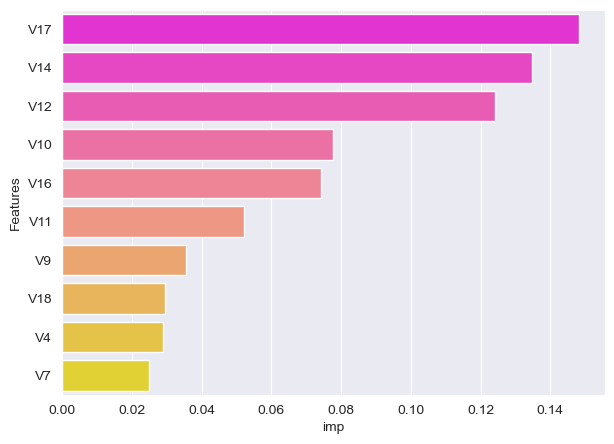

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x=features['imp'][:10],
            y=features['Features'][:10],
            palette='spring')
plt.show()